<br>

# TextVQG Evaluation Notebook
-----

In [1]:
import os
import json
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nlgeval import NLGEval

from collections import Counter

In [2]:
path = "./random"
models = next(os.walk(path))[1]
print(models)

['no transformer', 'transformer test sense answer', 'transformer with answers', 'transformer BB 64']


In [3]:
def test_different_questions(questions):
    return dict(Counter(questions))

In [7]:
# Read data and save DataFrame

df_scores = pd.DataFrame()
df_gen_questions = pd.DataFrame()
df_indices = pd.DataFrame()

for model in models:
    epochs = next(os.walk(f"{path}/{model}"))[1]
    for epoch in epochs:
        e = epoch.split("-")[1]
        
        try:
            with open(f"{path}/{model}/{epoch}/preds.json") as file:
                gen_questions = json.load(file)
                file.close()
            aux = {}
            aux["Questions"] = test_different_questions(gen_questions)
            aux["all_questions"] = gen_questions
            aux["ModelName"] = model
            aux["Epoch"] = int(e)
            df_gen_questions = df_gen_questions.append(aux, ignore_index=True)
        except:
            pass
        
        try:
            with open(f"{path}/{model}/{epoch}/indices.json") as file:
                indices_list = json.load(file)
                file.close()
            ind = {}
            ind["Index"] = indices_list
            ind["ModelName"] = model
            ind["Epoch"] = int(e)
            df_indices = df_indices.append(ind, ignore_index=True)
        except:
            pass
        
        if not os.path.isfile(f"{path}/{model}/{epoch}/scores.json"):
            try:
                with open(f"{path}/{model}/{epoch}/preds.json") as file:
                    preds = json.load(file)
                    file.close()

                with open(f"{path}/{model}/{epoch}/gts.json") as file:
                    gts = json.load(file)
                    file.close()
            except:
                pass

            nlge = NLGEval(no_skipthoughts=True)
            scores = nlge.compute_metrics(ref_list=[gts], hyp_list=preds)

            with open(f"{path}/{model}/{epoch}/scores.json", 'w') as fp:
                json.dump(scores, fp)
        with open(f"{path}/{model}/{epoch}/scores.json") as file:
            scores = json.load(file)
            file.close()
        
        aux = {}
        aux["Bleu_1"] = scores["Bleu_1"]
        aux["Bleu_2"] = scores["Bleu_2"]
        aux["Bleu_3"] = scores["Bleu_3"]
        aux["Bleu_4"] = scores["Bleu_4"]
        aux["METEOR"] = scores["METEOR"]
        aux["ROUGE_L"] = scores["ROUGE_L"]
        aux["CIDEr"] = scores["CIDEr"]
        aux["EmbeddingAverageCosineSimilarity"] = scores["EmbeddingAverageCosineSimilarity"]
        aux["VectorExtremaCosineSimilarity"] = scores["VectorExtremaCosineSimilarity"]
        aux["GreedyMatchingScore"] = scores["GreedyMatchingScore"]
        aux["ModelName"] = model
        aux["Epoch"] = int(epoch.split("-")[1])

        df_scores = df_scores.append(aux, ignore_index=True)

        
#df_metrics = df_metrics.sort_values(["ModelName", "Epoch"])
df_gen_questions = df_gen_questions.sort_values(["ModelName", "Epoch"])
df_scores = df_scores.sort_values(["ModelName", "Epoch"])

In [8]:
df_scores

Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L     CIDEr  \
38   0.429263  0.289011  0.206285  0.147110  0.145774  0.429753  0.456922   
28   0.437375  0.293961  0.209074  0.147377  0.147860  0.420167  0.500293   
43   0.436856  0.296655  0.212263  0.150850  0.152297  0.431655  0.584503   
25   0.438690  0.299680  0.215059  0.153482  0.155763  0.434844  0.626625   
13   0.445513  0.304238  0.217246  0.153894  0.159242  0.434816  0.644347   
..        ...       ...       ...       ...       ...       ...       ...   
157  0.422293  0.263771  0.173949  0.115613  0.150274  0.402379  0.569584   
155  0.416357  0.264868  0.178681  0.117964  0.149376  0.400414  0.567792   
148  0.423361  0.268273  0.179968  0.120366  0.151130  0.402717  0.603281   
127  0.416867  0.261710  0.171233  0.112225  0.149463  0.398084  0.548581   
131  0.417487  0.268986  0.179405  0.118218  0.152839  0.405891  0.576263   

     EmbeddingAverageCosineSimilarity  VectorExtremaCosineSimilarity  \
38                           0.862494                       0.506966   
28                           0.862160                       0.508090   
43                           0.864061                       0.519841   
25                           0.866307                       0.525646   
13                           0.867430                       0.527591   
..                                ...                            ...   
157                          0.855225                       0.499726   
155                          0.853444                       0.500539   
148                          0.855282                       0.501094   
127                          0.856003                       0.499049   
131                          0.857094                       0.499539   

     GreedyMatchingScore                 ModelName  Epoch  
38              0.738720            no transformer    1.0  
28              0.740298            no transformer    2.0  
43              0.745089            no transformer    3.0  
25              0.748457            no transformer    4.0  
13              0.749353            no transformer    5.0  
..                   ...                       ...    ...  
157             0.723920  transformer with answers   46.0  
155             0.724043  transformer with answers   47.0  
148             0.725354  transformer with answers   48.0  
127             0.724274  transformer with answers   49.0  
131             0.725548  transformer with answers   50.0  

[216 rows x 12 columns]

In [9]:
df_gen_questions

Questions  \
38   {'what is the name of the sign': 444, 'what is...   
28   {'what is the name of the street': 165, 'what ...   
43   {'what is the name of the store': 420, 'what i...   
25   {'what is the name of the store': 316, 'what i...   
13   {'what is the name of the street': 73, 'what i...   
..                                                 ...   
156  {'what does the bottom most word on the red si...   
154  {'what does the white sign say': 2, 'what is t...   
147  {'what does the red sign read': 4, 'what is pr...   
126  {'what does the bottom sign say': 1, 'what is ...   
130  {'what does the bottom sign say': 1, 'what is ...   

                                         all_questions  \
38   [what is the name of the sign, what is the nam...   
28   [what is the name of the street, what is the n...   
43   [what is the name of the store, what is the na...   
25   [what is the name of the store, what is the na...   
13   [what is the name of the street, what is the n...   
..                                                 ...   
156  [what does the bottom most word on the red sig...   
154  [what does the white sign say, what is the mod...   
147  [what does the red sign read, what is printed ...   
126  [what does the bottom sign say, what is the bi...   
130  [what does the bottom sign say, what is being ...   

                    ModelName  Epoch  
38             no transformer    1.0  
28             no transformer    2.0  
43             no transformer    3.0  
25             no transformer    4.0  
13             no transformer    5.0  
..                        ...    ...  
156  transformer with answers   46.0  
154  transformer with answers   47.0  
147  transformer with answers   48.0  
126  transformer with answers   49.0  
130  transformer with answers   50.0  

[215 rows x 4 columns]

In [10]:
for idx, model in df_gen_questions.iterrows():
    print("Model:", model["ModelName"], "  Epoch:", model["Epoch"])
    print("   --> Different questions:", len(model["Questions"]))
    #for q in model["Questions"]:
    #    print("        -", q, "   Rep.", model["Questions"][q])
    print(" ")

Model: no transformer   Epoch: 1.0
   --> Different questions: 2
 
Model: no transformer   Epoch: 2.0
   --> Different questions: 23
 
Model: no transformer   Epoch: 3.0
   --> Different questions: 31
 
Model: no transformer   Epoch: 4.0
   --> Different questions: 57
 
Model: no transformer   Epoch: 5.0
   --> Different questions: 79
 
Model: no transformer   Epoch: 6.0
   --> Different questions: 114
 
Model: no transformer   Epoch: 7.0
   --> Different questions: 148
 
Model: no transformer   Epoch: 8.0
   --> Different questions: 168
 
Model: no transformer   Epoch: 9.0
   --> Different questions: 201
 
Model: no transformer   Epoch: 10.0
   --> Different questions: 232
 
Model: no transformer   Epoch: 11.0
   --> Different questions: 244
 
Model: no transformer   Epoch: 12.0
   --> Different questions: 282
 
Model: no transformer   Epoch: 13.0
   --> Different questions: 289
 
Model: no transformer   Epoch: 14.0
   --> Different questions: 303
 
Model: no transformer   Epoch: 15.0

Model: no transformer


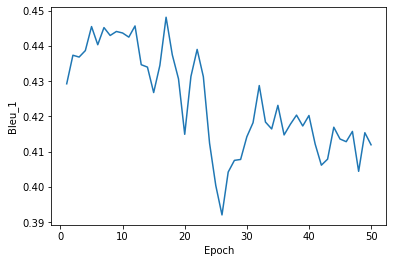

Model: transformer test sense answer


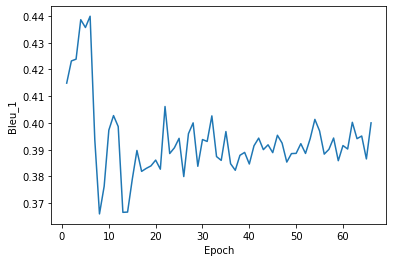

Model: transformer with answers


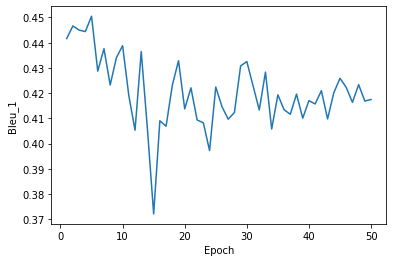

Model: transformer BB 64


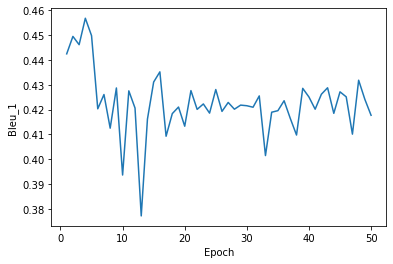

In [11]:
for model in models:
    print("Model:", model)
    df_model = df_scores[df_scores["ModelName"]==model]
    sns.lineplot(y="Bleu_1", x="Epoch", data=df_model)
    plt.show()

In [12]:
with open(f"img_paths.json") as file:
    img_paths = json.load(file)
    file.close()


Question: what is the name of the street on the sign


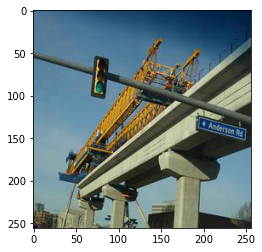

Question: what does the text on the bottom right say


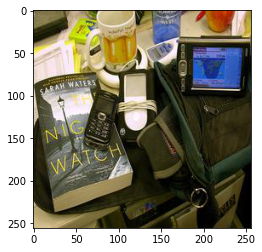

Question: what is the number on the bus


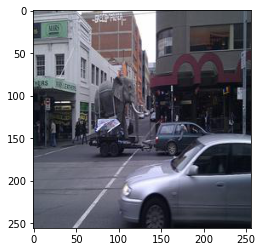

Question: what is the brand name


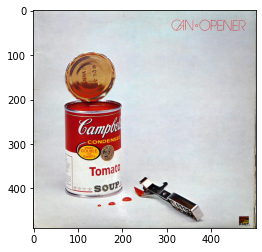

Question: what is the brand of the product


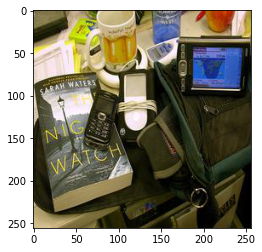

Question: what is the brand of the book


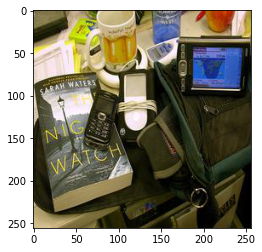

Question: what is the bus number


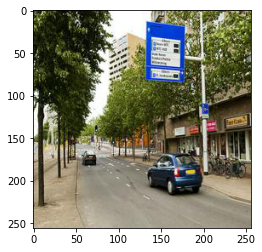

Question: what is the name of the store


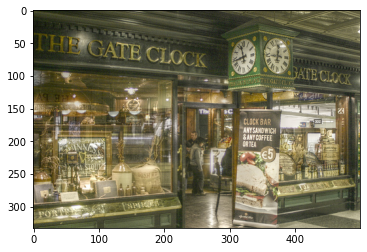

Question: what is the name of the blue sign


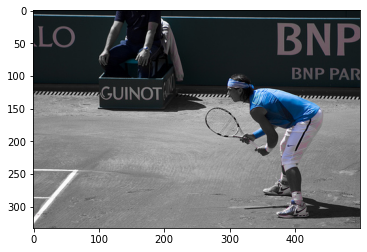

Question: what is the number of the boat


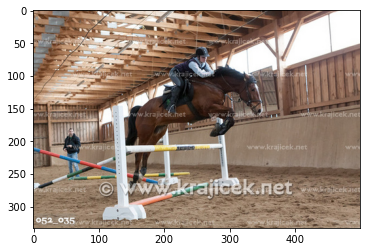

Question: what does the text say on the bottom of the image


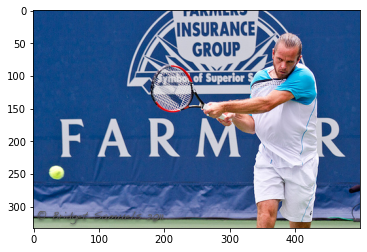

Question: what is the number on the top of the sign


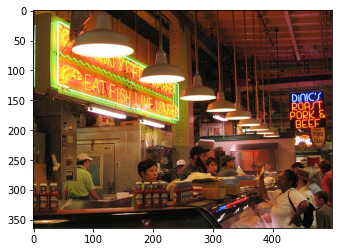

Question: what is the name of the photographer


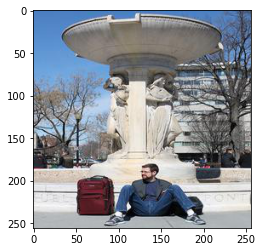

Question: what is the name of the bus


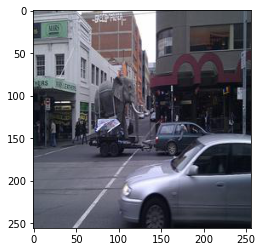

Question: what is the bus number


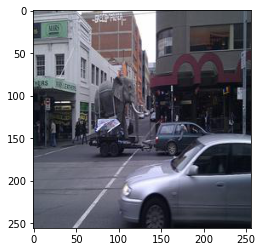

Question: what is the number of the street


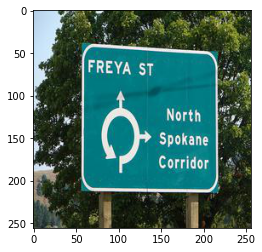

Question: what is the name of the street on the sign


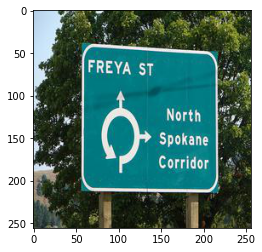

Question: where is the bus going


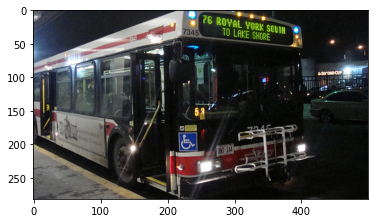

Question: what is the license plate number


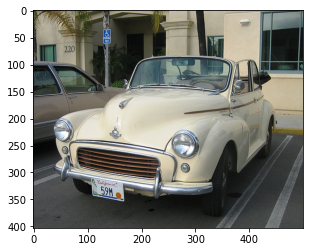

Question: what is written on the top of the sign


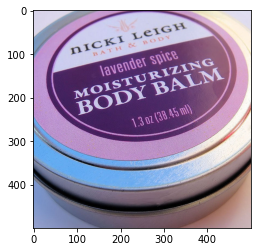

Question: what is the bus number


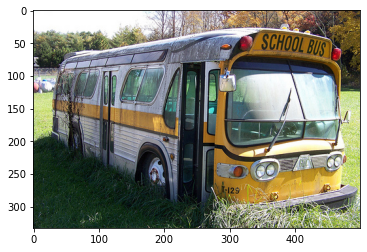

Question: what is the bus number


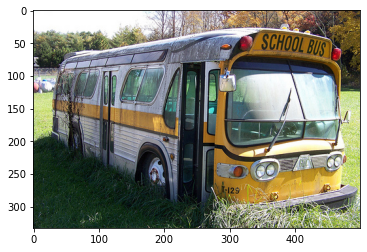

Question: what number is on the right


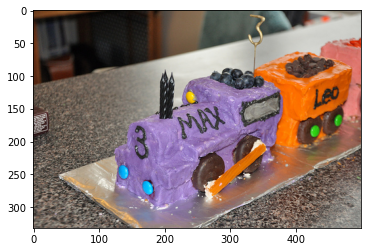

Question: what does the sign say


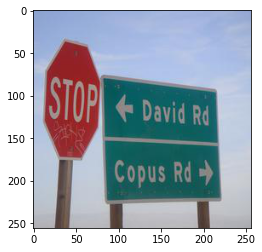

Question: what is written on the red sign


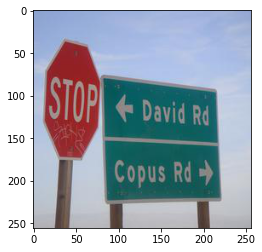

Question: what is the name of the street


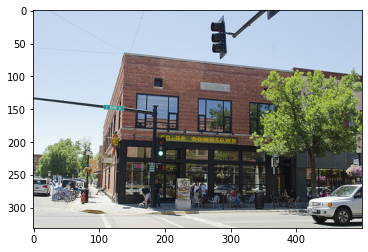

Question: what is the name of the store on the left


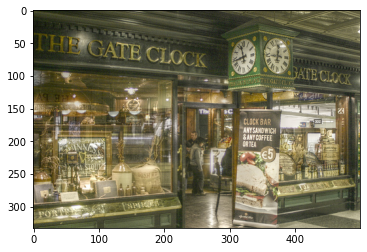

Question: what is the number of the boat


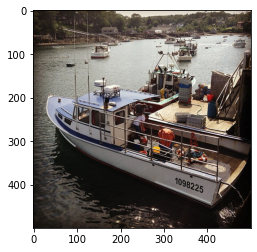

Question: what does the sign say


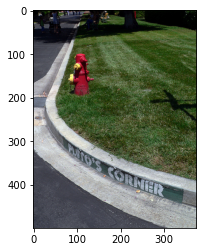

Question: what is the brand of the product


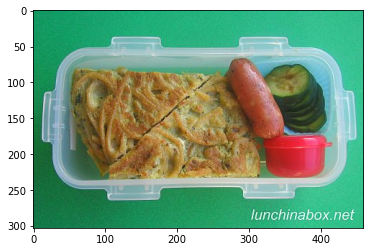

Question: what is the bus number


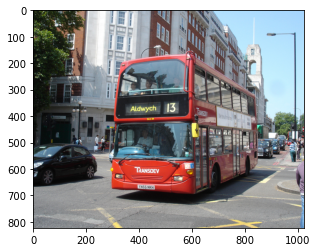

Question: what is the number of the street


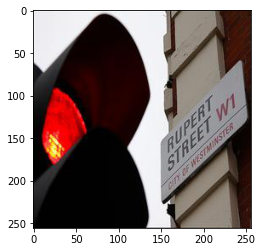

Question: what is the name of the player


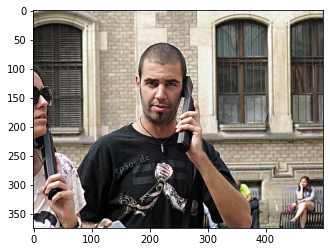

Question: what is the brand name


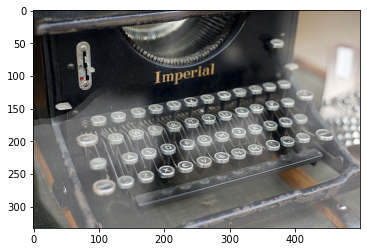

Question: what is the name of the player


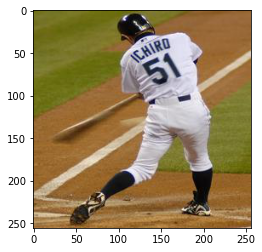

Question: what is the number on the front of the bus


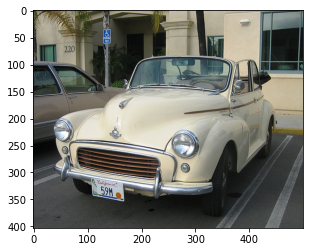

Question: what does the text on the bottom left say


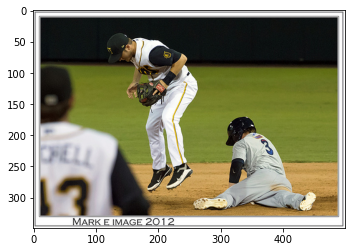

Question: what is the bus number


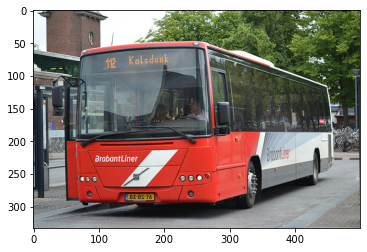

Question: what is the name of the company on the sign


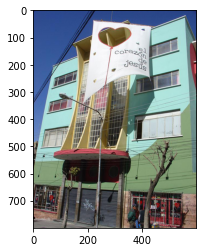

Question: what is the number of the street


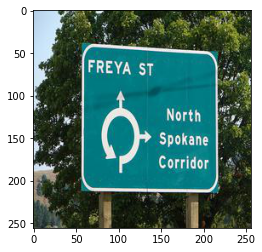

In [16]:
# Load images and generated questions
l = range(0, 40)
model = "no transformer"
epoch = 10

for i in l:
    question = df_gen_questions.loc[(df_gen_questions['ModelName']==model) & (df_gen_questions['Epoch']==epoch)]['all_questions'].iloc[0][i]
    index = df_indices.loc[(df_indices['ModelName']==model) & (df_indices['Epoch']==epoch)]['Index'].iloc[0][i]
    print("Question:", question)
    path = img_paths[str(index)]
    img=mpimg.imread(f'data/ST-VQA/{path}')
    plt.imshow(img)
    plt.show()